In [15]:
import json
import pandas as pd
import plotly.express as px

In [3]:
with open ('../data/anomaly_summary.json', 'r') as fin:
    data = json.loads(fin.read())

In [32]:
df = pd.DataFrame(data, columns=['gid', 'anomaly_scores', 'cluster', 'input_edge'])
df

,gid,anomaly_scores,cluster,input_edge
0,41,0.912149,-1,"[41, 5, 449, 12c, a3, 41]"
1,182,0.978011,-1,"[182, 5, 444, 128, a1, 182]"
2,140,0.978011,-1,"[140, 5, 444, 128, a1, 140]"
3,182,0.978011,-1,"[182, 5, 444, 128, a1, 182]"
4,107,0.978011,-1,"[107, 5, 444, 128, a1, 107]"
...,...,...,...,...
6868,273,1.000000,-1,"[273, 5, 419, 112, 9b, 273]"
6869,204,0.874667,0,"[204, 5, 444, 128, 102, 204]"
6870,273,0.996858,-1,"[273, 5, 419, 112, 67, 273]"
6871,204,0.874667,0,"[204, 5, 444, 128, a1, 204]"


In [40]:
df['edge_order'] = df.groupby('gid')['anomaly_scores'].cumcount()+1
df = df.sort_values(by=['gid', 'edge_order'])

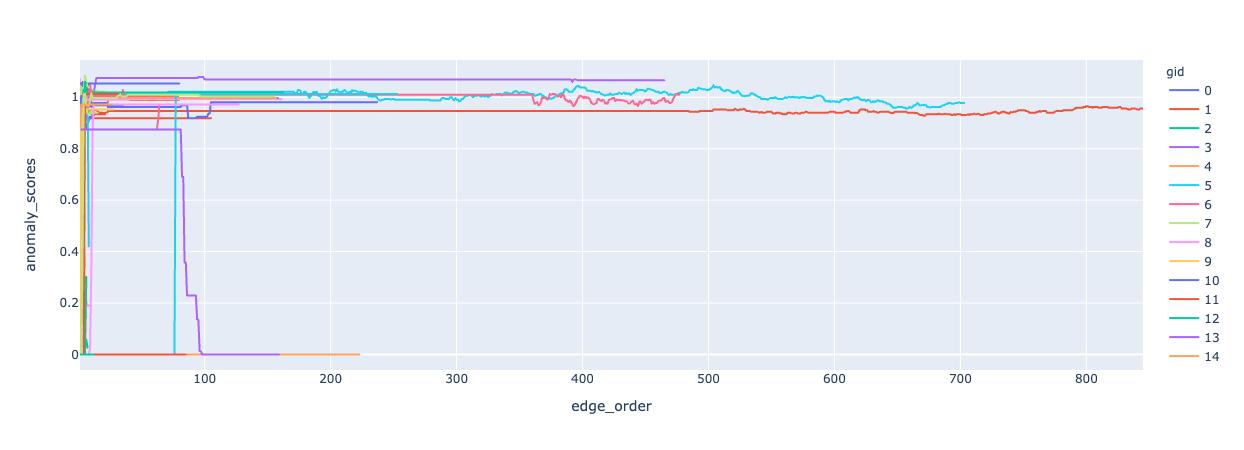

In [41]:
fig = px.line(df, x='edge_order', y='anomaly_scores', color='gid')
# fig.update_layout(
#     legend={'traceorder':'normal'}
# )

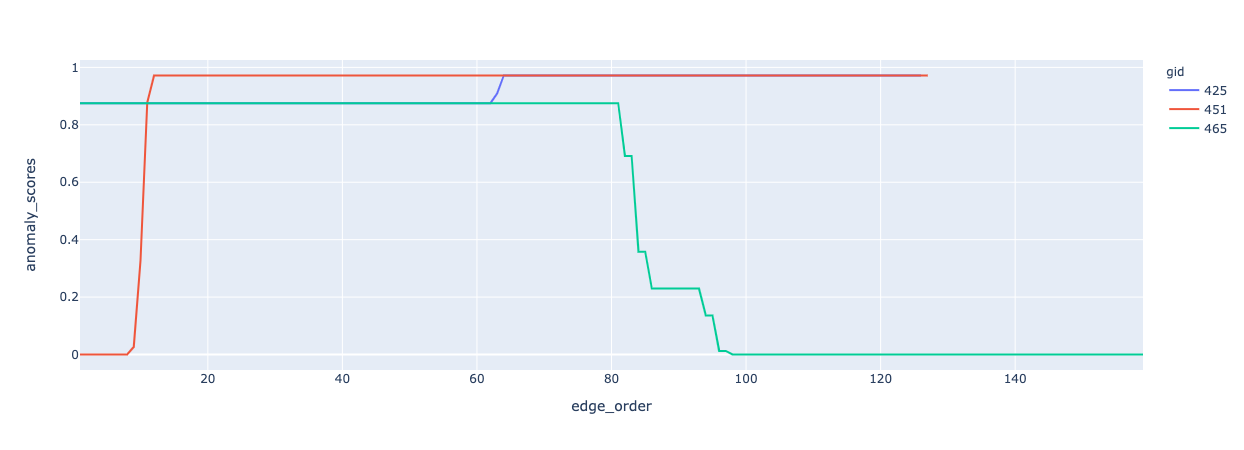

In [44]:
# 465, 451
px.line(df[df.gid.isin([465, 451, 425])], x='edge_order', y='anomaly_scores', color='gid')

In [ ]:
# hide long lines: 63, 45, 33, 300